

# Project: Investigate a Dataset (Analysing TMDB Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB Movie Data**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> **Questions:**
>
> * Which movie has the highest Profit? Which movie has the lowest Profit?
>
> * How many documentary movies there? is investing in it waste money?
>
> * which director, cast, genres are in great demand?
>
> * Movies profits investigation increased or decreased every year? Is it a good investment?

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import re
import collections

<a id='wrangling'></a>
## Data Wrangling

 Data Cleaning (Replace this with more specific notes!)
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 1000$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [47]:
# Load tmdb-movies into pandas 
tmdb_df=pd.read_csv("tmdb-movies.csv")
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
#review columns 
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [49]:
# check is there any duplication
tmdb_df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [50]:
# show statistics of whole data
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 100$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [51]:
# Make copy of data to clean
tmdb_df_cleaned=tmdb_df.copy()

In [52]:
#Drop duplicate values
tmdb_df_cleaned.drop_duplicates(inplace=True)

In [53]:
#drop columns that i will not use and contain no important data  [id,imdb_id,popularity] 
tmdb_df_cleaned.drop(columns=['id','imdb_id','popularity'],inplace=True)

In [54]:
#test the drop operation 
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [55]:
#Change Data type of  release_date to date time
tmdb_df_cleaned['release_date']=pd.to_datetime(tmdb_df_cleaned['release_date'])
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [56]:
#test Data type of  release_date
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                10865 non-null  int64         
 1   revenue               10865 non-null  int64         
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   homepage              2936 non-null   object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count      

In [57]:
#Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions or billions .
col=['budget_adj','revenue_adj']
tmdb_df_cleaned[col]=tmdb_df_cleaned[col].astype(int)
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292


In [58]:
#test Change data type of budget_adj and revenue_adj
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                10865 non-null  int64         
 1   revenue               10865 non-null  int64         
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   homepage              2936 non-null   object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count      

In [59]:
# drop all data >100$ in budget_adj and revenue_adj
tmdb_df_cleaned=tmdb_df_cleaned[(tmdb_df_cleaned['budget_adj']>100) & (tmdb_df_cleaned['revenue_adj']>100)]
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292


In [60]:
#test the drop operation 
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3820 non-null   int64         
 1   revenue               3820 non-null   int64         
 2   original_title        3820 non-null   object        
 3   cast                  3816 non-null   object        
 4   homepage              1412 non-null   object        
 5   director              3819 non-null   object        
 6   tagline               3547 non-null   object        
 7   keywords              3687 non-null   object        
 8   overview              3820 non-null   object        
 9   runtime               3820 non-null   int64         
 10  genres                3820 non-null   object        
 11  production_companies  3776 non-null   object        
 12  release_date          3820 non-null   datetime64[ns]
 13  vote_count       

<a id='eda'></a>
## Exploratory Data Analysis

> **Questions:**
>
> * Which movie has the highest Profit? Which movie has the lowest Profit?
>
> * How many documentary movies there? is investing in it waste money?
>
> * which director, cast, genres are in great demand?
>
> * Movies profits investigation increased or decreased every year? Is it a good investment?

### Research Question 1 (Which movie has the highest Profit? Which movie has the lowest Profit?)

In [61]:
# calculate the profit for all  movies
tmdb_df_cleaned['profit']=tmdb_df_cleaned['revenue_adj']-tmdb_df_cleaned['budget_adj']

In [62]:
# movie with highest profit is 'Jaws' with profit 1878643093
tmdb_df_cleaned[tmdb_df_cleaned['profit']==tmdb_df_cleaned['profit'].max()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
9806,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28362748,1907005841,1878643093


In [63]:
tmdb_df_cleaned['profit'].describe()

count    3.820000e+03
mean     9.114745e+07
std      1.793274e+08
min     -4.139124e+08
25%     -1.503876e+06
50%      2.802600e+07
75%      1.079638e+08
max      1.878643e+09
Name: profit, dtype: float64

In [64]:
# movie with lowest profit is "The Warrior's Way" movie lose 413912431 $ 
tmdb_df_cleaned[tmdb_df_cleaned['profit']==tmdb_df_cleaned['profit'].min()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569,-413912431


In [65]:
# Get highest 10 movie in profit
tmdb_df_cleaned['profit'].nlargest(10)

9806     1878643093
8889     1767968064
3        1718723210
8094     1551568265
10110    1545635295
7309     1376997526
10398    1319404004
10223    1293766704
0        1254445953
7269     1246626367
Name: profit, dtype: int32

In [66]:
#get top_10  in pandas data frame
tmdb_top_10_revenue=tmdb_df_cleaned[lambda x :x['profit'] >= 1246626367]
tmdb_top_10_revenue.groupby('original_title')['profit'].sum()

original_title
E.T. the Extra-Terrestrial        1767968064
Jaws                              1878643093
Jurassic Park                     1293766704
Jurassic World                    1254445953
One Hundred and One Dalmatians    1545635295
Star Wars: The Force Awakens      1718723210
The Empire Strikes Back           1376997526
The Godfather                     1246626367
The Jungle Book                   1319404004
The Net                           1551568265
Name: profit, dtype: int32

In [67]:
# Get lowest 10 movie in profit
tmdb_df_cleaned['profit'].nsmallest(10)

2244   -413912431
5508   -155110171
7031   -137586847
2435   -128681336
4970   -118534968
8102   -113737078
4078   -112614267
3484   -107610203
7332   -107205950
8765    -95189608
Name: profit, dtype: int32

In [68]:
#get min_10  in pandas data frame
tmdb_min_10_revenue=tmdb_df_cleaned[lambda x :x['profit'] <= -91445050]
tmdb_min_10_revenue.groupby('original_title')['profit'].sum()

original_title
Brother Bear                   -118534968
Charlotte's Web                 -91941723
Cutthroat Island               -113737078
Flushed Away                    -91445050
Heaven's Gate                  -107205950
Mars Needs Moms                -107610203
Supernova                       -95189608
The 13th Warrior               -128681336
The Adventures of Pluto Nash   -112614267
The Alamo                      -137586847
The Lone Ranger                -155110171
The Warrior's Way              -413912431
Name: profit, dtype: int32

In [69]:
#Function to plot relation between x , y get list and labels
def plot_relation_rate(stage,xlabel,ylabel,message):
    stage=stage.sort_values()
    plt.figure(figsize=(14, 9))
    plt.barh(stage.index,stage.array)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

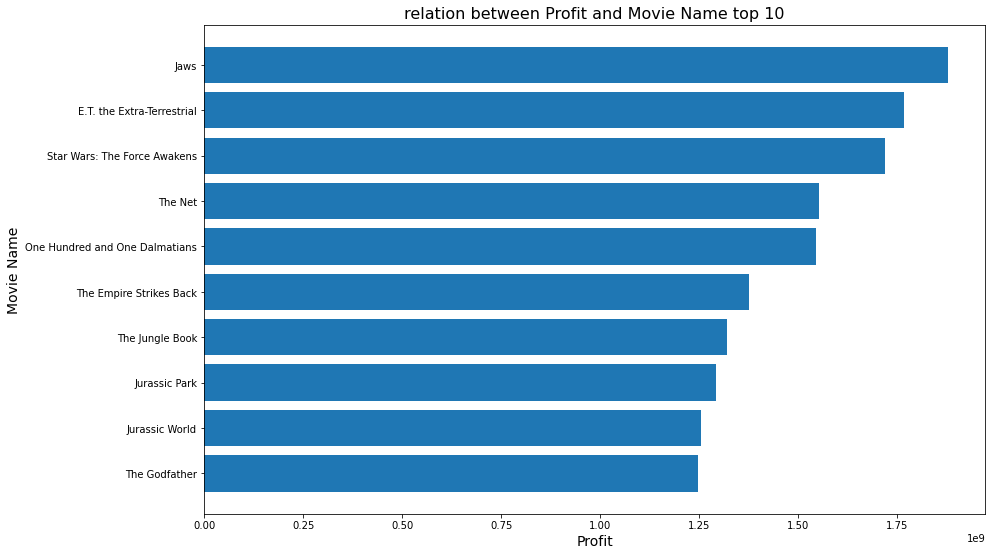

In [70]:
# plot  highest 10 movie name 
top_stage=tmdb_top_10_revenue.groupby(['original_title'])['profit'].sum()
plot_relation_rate(top_stage,'Profit','Movie Name',"top 10")

In [71]:
top_stage

original_title
E.T. the Extra-Terrestrial        1767968064
Jaws                              1878643093
Jurassic Park                     1293766704
Jurassic World                    1254445953
One Hundred and One Dalmatians    1545635295
Star Wars: The Force Awakens      1718723210
The Empire Strikes Back           1376997526
The Godfather                     1246626367
The Jungle Book                   1319404004
The Net                           1551568265
Name: profit, dtype: int32

>  as in  above figure all those great movies has the highest profits  no one will wonder why as we saw those movies has agreat story a great actors and actress."Jaws" acheive 1878643093 $ in 1975 which is a perfect profit .

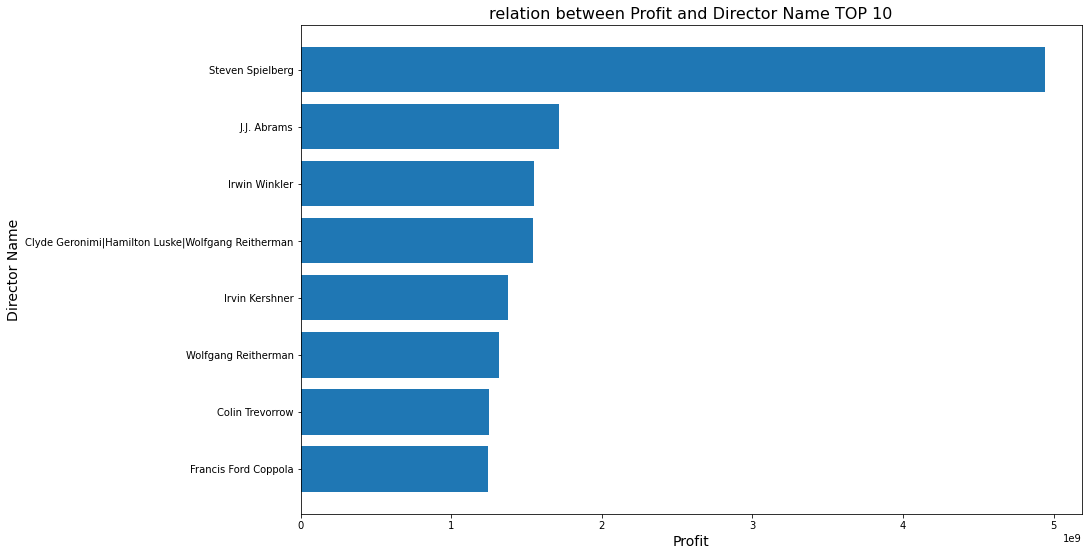

In [72]:
# plot  highest 10 directors with highest profit 
top_stage=tmdb_top_10_revenue.groupby(['director'])['profit'].sum()
plot_relation_rate(top_stage,'Profit','Director Name',"TOP 10")

In [73]:
top_stage

director
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.545635e+09
Colin Trevorrow                                      1.254446e+09
Francis Ford Coppola                                 1.246626e+09
Irvin Kershner                                       1.376998e+09
Irwin Winkler                                        1.551568e+09
J.J. Abrams                                          1.718723e+09
Steven Spielberg                                     4.940378e+09
Wolfgang Reitherman                                  1.319404e+09
Name: profit, dtype: float64

> as in above figure we can see that choosing director for movie affect profit. for example "Steven Spielberg" movie profits exceeds all other director with high rate. 

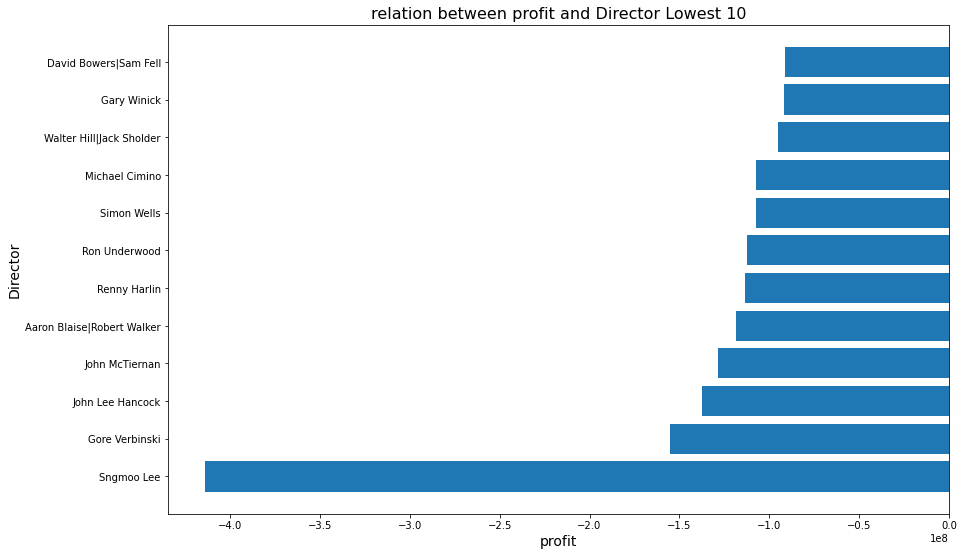

In [74]:
# plot  lowest 10 directors with lowest profit 
top_stage=tmdb_min_10_revenue.groupby(['director'])['profit'].sum()
plot_relation_rate(top_stage,'profit','Director','Lowest 10')

> as in above figure we can see that choosing director for movie affect profit and can be disaster as all above movie lose massive amount of mony. for example "sngmoo" loss exceeds all other director with high rate. 

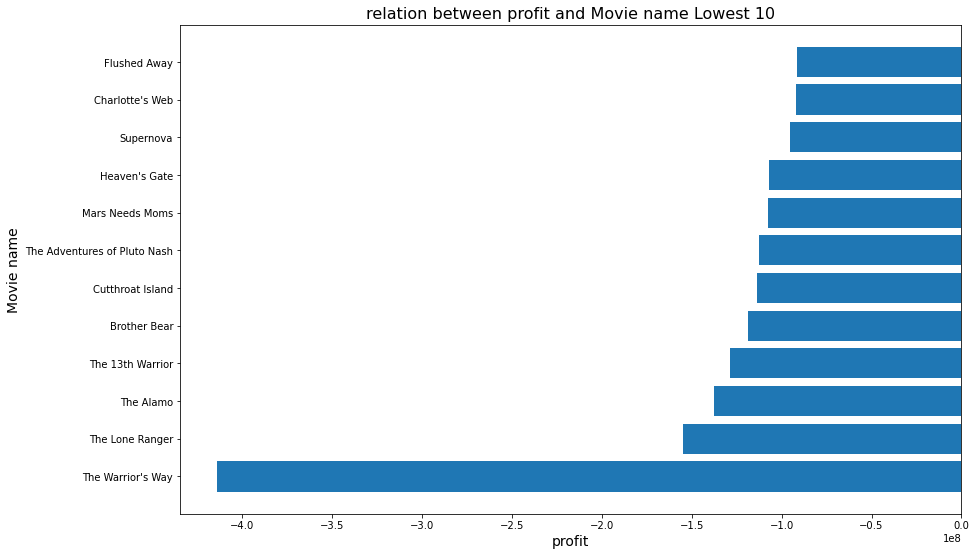

In [75]:
# plot  lowest 10 movies name with lowest profit 
top_stage=tmdb_min_10_revenue.groupby(['original_title'])['profit'].sum()
plot_relation_rate(top_stage,'profit','Movie name',"Lowest 10")

> as movies can be a good investment but also any loss can be dissaster."The Warrior's Way" loss about 413912431 $  in 2010 . we should with get more information for fail factors.

### Research Question 2  (How many documentary movies there? is investing in it waste money?)

In [76]:
# How many documentry movie ? there are 35 .
tmdb_df=tmdb_df_cleaned[tmdb_df_cleaned['genres'].str.contains('Documentary')]
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1542 to 10093
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                35 non-null     int64         
 1   revenue               35 non-null     int64         
 2   original_title        35 non-null     object        
 3   cast                  31 non-null     object        
 4   homepage              22 non-null     object        
 5   director              35 non-null     object        
 6   tagline               28 non-null     object        
 7   keywords              34 non-null     object        
 8   overview              35 non-null     object        
 9   runtime               35 non-null     int64         
 10  genres                35 non-null     object        
 11  production_companies  28 non-null     object        
 12  release_date          35 non-null     datetime64[ns]
 13  vote_count      

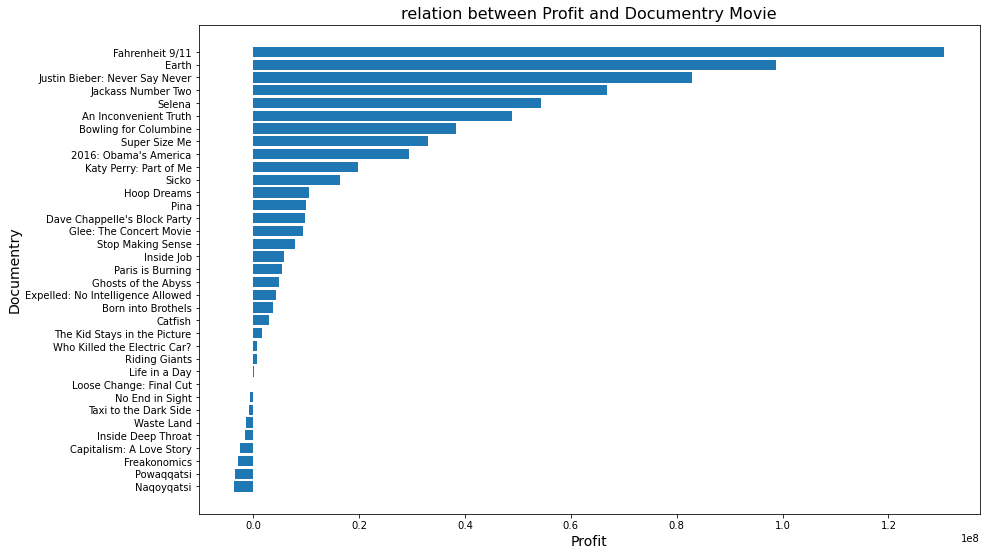

In [77]:
# there is about 35 documentary movie and the relation between profit and movies
top_stage=tmdb_df.groupby(['original_title'])['profit'].sum()
plot_relation_rate(top_stage,'Profit','Documentry',"Movie")

> From the figure we found that most of documentry movie has a good rate in profit as from 35 movie only 8 has loss  which when we compare bugdget and revenue we notice small different.
> * Let's found the relation between percentage of all losing movies  and losing documentary movies

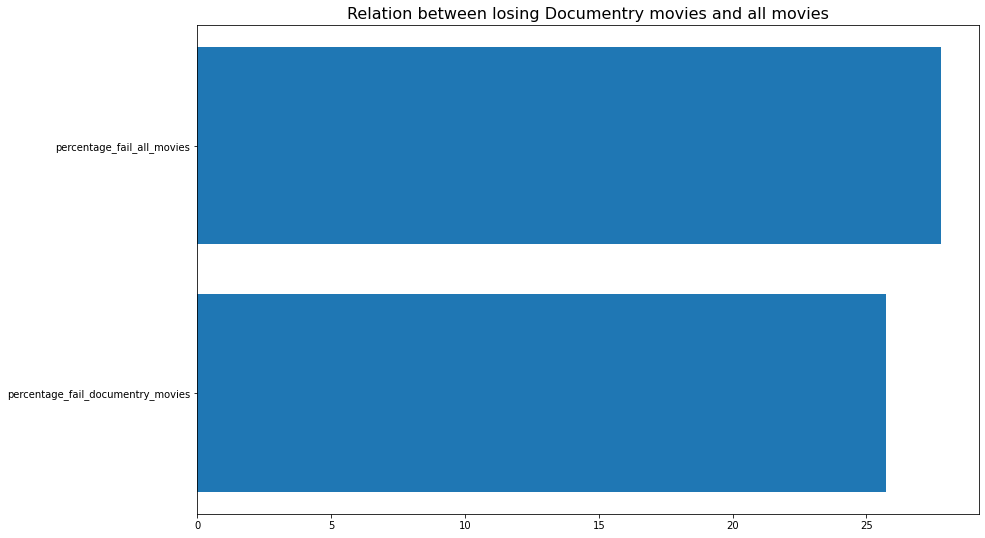

In [78]:
#compare the precentage of losing movies budget>revenue  in both all movies and documentry movies
fail_d_movies=tmdb_df[tmdb_df['profit']<=0].count().max()
all_d_movies=tmdb_df['profit'].count().max()
percentage_fail_documentry_movies=(fail_d_movies/all_d_movies)*100
percentage_fail_all_movies=((tmdb_df_cleaned[tmdb_df_cleaned['profit']<=0].count().max())/(tmdb_df_cleaned['profit'].count().max()))*100
plt.figure(figsize=(14, 9))
plt.barh(['percentage_fail_documentry_movies','percentage_fail_all_movies'],[percentage_fail_documentry_movies,percentage_fail_all_movies])
plt.title('Relation between losing Documentry movies and all movies', fontsize = 16)
plt.show();

In [79]:
print ("The percentage_fail_documentry_movies = ",percentage_fail_documentry_movies,'and percentage_fail_all_movies =',percentage_fail_all_movies)

The percentage_fail_documentry_movies =  25.71428571428571 and percentage_fail_all_movies = 27.801047120418847


> ####  From the figure we found that most of documentry movie has a good success rate which is almost less than the loss rate in movies in general we can conclode that this is good investment

### Research Question 3  (which director, cast, genres are in great demand?)

In [80]:
#Function to plot relation between x , y take dictionary variable
def plot_relation_rate_dic(dic,xlabel,ylabel,message):
    type(dic)
    dic=dict(sorted(dic.items(), key=lambda item: item[1]))
    plt.figure(figsize=(22, 10), dpi = 130)
    plt.xlabel(xlabel ,fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.bar(dic.keys(),dic.values())
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

In [81]:
#function to count each row in data frame column  and his occurance using regular expression
def data_occurance_rate_due_profit(data):
    temparr={}
    for item in data:
        try:
            data_temp=re.search(r'[\w\W]+',item).group().split('|')
           # print(data_temp)
            for item in data_temp:
                if(item in temparr):
                    temparr[item]=temparr[item]+1
                else:
                    temparr[item]=1
        except :
            continue
    return temparr

In [82]:
#Get most wanted movies geners and sort them with largest
geners=data_occurance_rate_due_profit(tmdb_df_cleaned['genres'])
dict(sorted(geners.items(), key=lambda item: item[1], reverse=True))

{'Drama': 1744,
 'Comedy': 1343,
 'Thriller': 1193,
 'Action': 1076,
 'Adventure': 744,
 'Romance': 657,
 'Crime': 649,
 'Science Fiction': 515,
 'Horror': 457,
 'Family': 424,
 'Fantasy': 392,
 'Mystery': 343,
 'Animation': 200,
 'Music': 133,
 'History': 128,
 'War': 119,
 'Western': 52,
 'Documentary': 35,
 'Foreign': 13,
 'TV Movie': 1}

> #### As we can see Drama then Comedy in a great demand

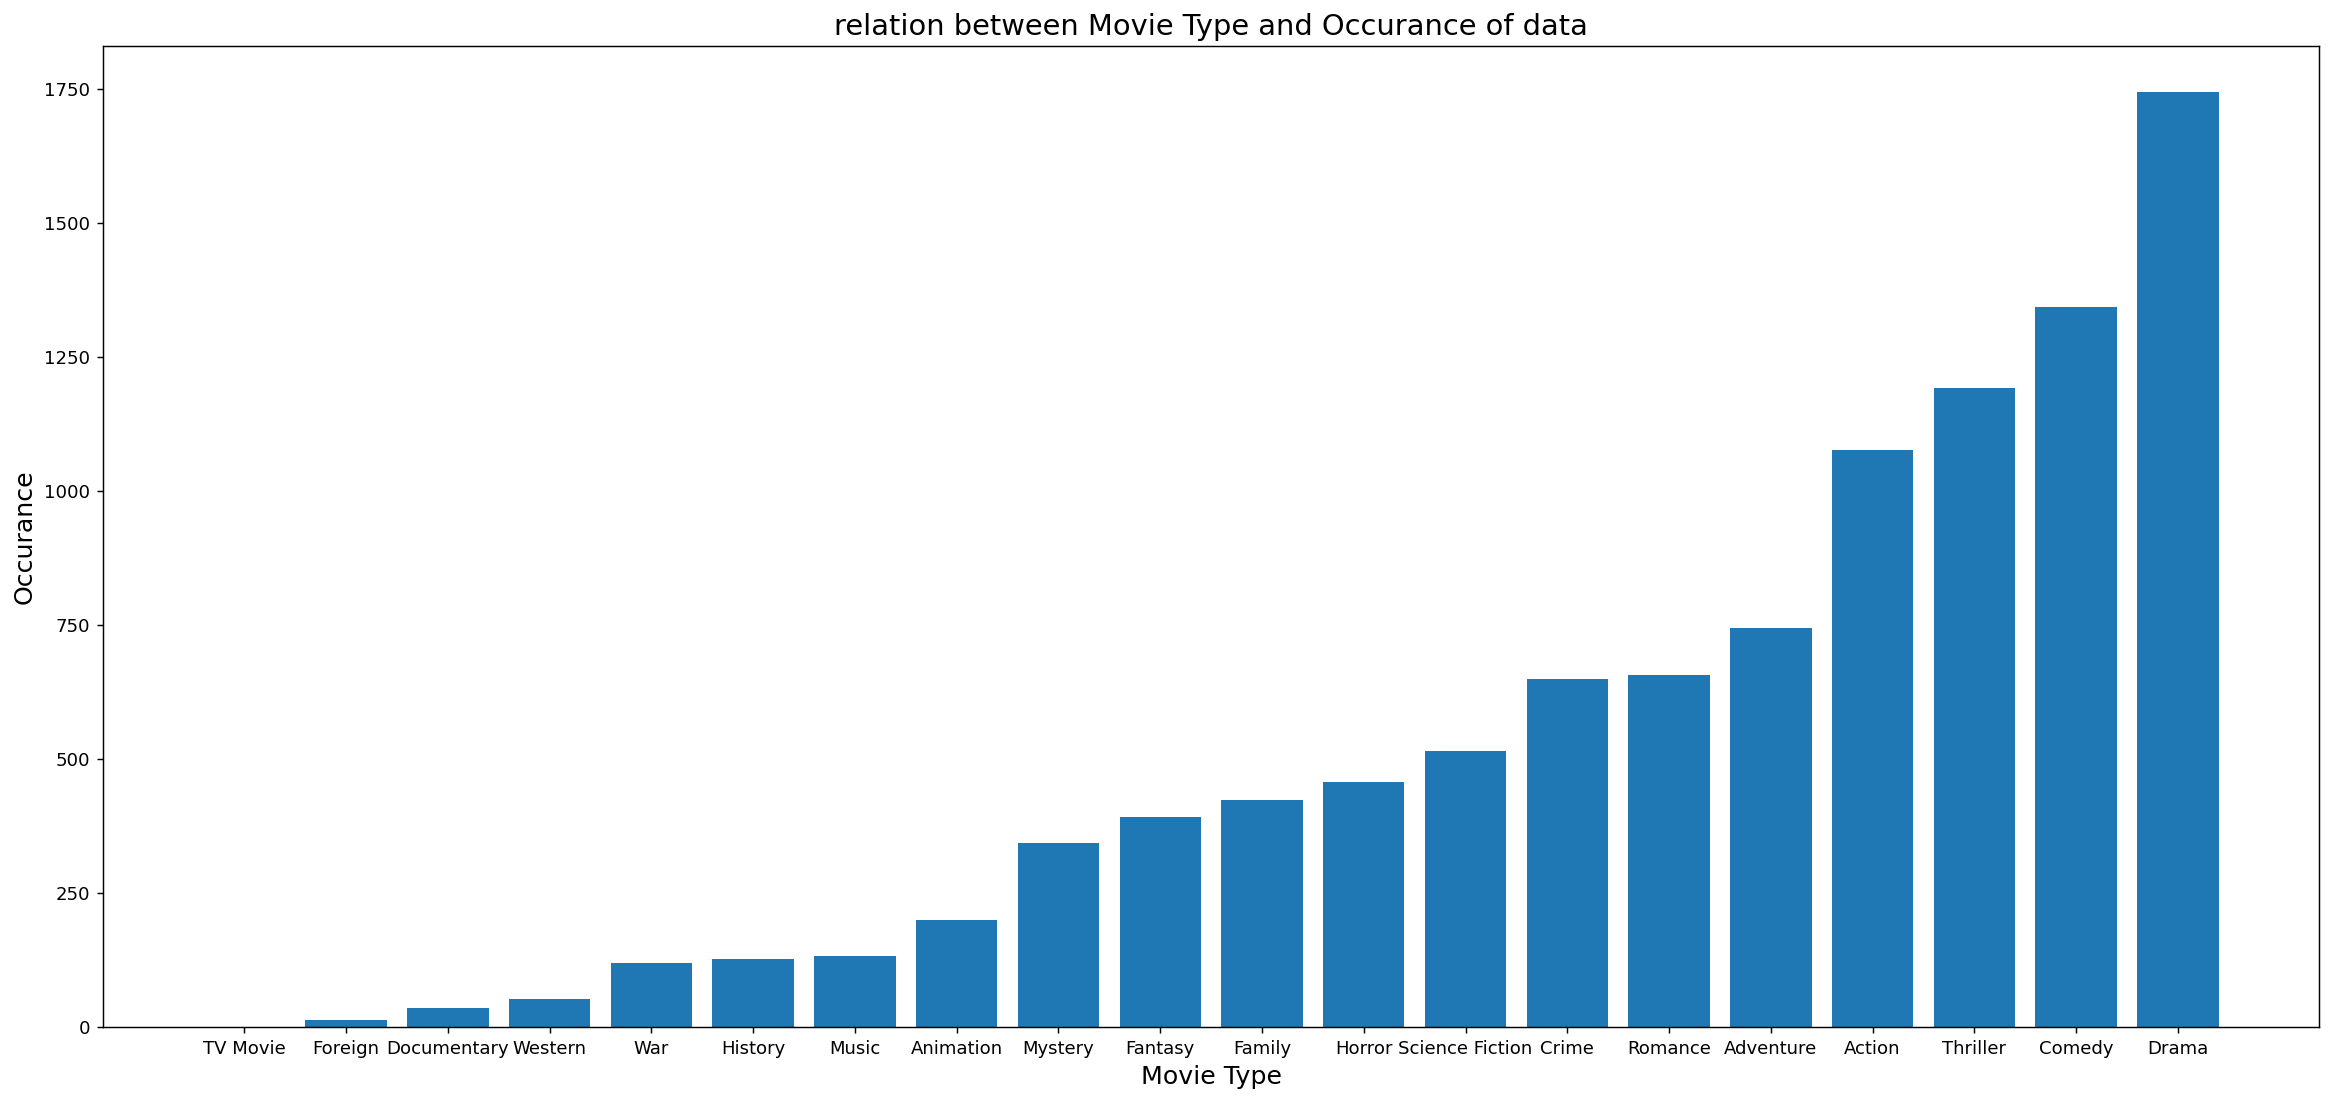

In [83]:
# plot bar diagram for movie geners
plot_relation_rate_dic(geners,'Movie Type','Occurance',"of data")

In [84]:
#Get Cast that  in great demand
cast=data_occurance_rate_due_profit(tmdb_df_cleaned['cast'])
dict(sorted(cast.items(), key=lambda item: item[1], reverse=True))
collections.Counter(dict(sorted(cast.items(), key=lambda item: item[1], reverse=True))).most_common(10)

[('Robert De Niro', 52),
 ('Bruce Willis', 46),
 ('Samuel L. Jackson', 43),
 ('Nicolas Cage', 43),
 ('Matt Damon', 36),
 ('Johnny Depp', 35),
 ('Brad Pitt', 34),
 ('Tom Hanks', 34),
 ('Harrison Ford', 33),
 ('Tom Cruise', 33)]

> #### As we can see 'Robert De Niro' and all above are  in great demand

In [85]:
#Get Director that  in great demand
director=data_occurance_rate_due_profit(tmdb_df_cleaned['director'])
dict(sorted(director.items(), key=lambda item: item[1], reverse=True))
collections.Counter(dict(sorted(director.items(), key=lambda item: item[1], reverse=True))).most_common(10)

[('Steven Spielberg', 28),
 ('Clint Eastwood', 24),
 ('Ridley Scott', 21),
 ('Woody Allen', 18),
 ('Robert Rodriguez', 17),
 ('Tim Burton', 17),
 ('Steven Soderbergh', 17),
 ('Martin Scorsese', 17),
 ('Robert Zemeckis', 15),
 ('Renny Harlin', 15)]

> #### As we can see 'Steven Spielberg' and all above are  in great demand
> * #### we can gather cast and one of the above directors and put them in a drama ,comedy or thrill movie and that will be a great investment

### Research Question 4  (Movies profits investment increased or decreased every year? Is it a good investment?)

In [86]:
tmdb_df_cleaned.groupby('release_year')['profit'].max()

release_year
1960     353902438
1961    1545635295
1962     421694260
1963     543972910
1964     853474464
1965    1072786239
1966     176258462
1967    1319404004
1968     280319034
1969     572485481
1970     753716632
1971     585909207
1972    1246626367
1973     760138651
1974     516964986
1975    1878643093
1976     593913194
1977    1021009368
1978     819690439
1979     580426232
1980    1376997526
1981     891949444
1982    1767968064
1983    1182994738
1984     640207822
1985     734056617
1986     680039989
1987     587518210
1988     608162159
1989     749629788
1990     806077995
1991     672458993
1992     739793586
1993    1293766704
1994    1093391570
1995    1551568265
1996    1031498096
1997     678402232
1998     553537805
1999    1059439453
2000     533600434
2001    1048582022
2002    1027133804
2003    1214854862
2004     888736813
2005     832868046
2006     936357520
2007     828938573
2008     827367505
2009     809752826
2010     863171911
2011    1166009242

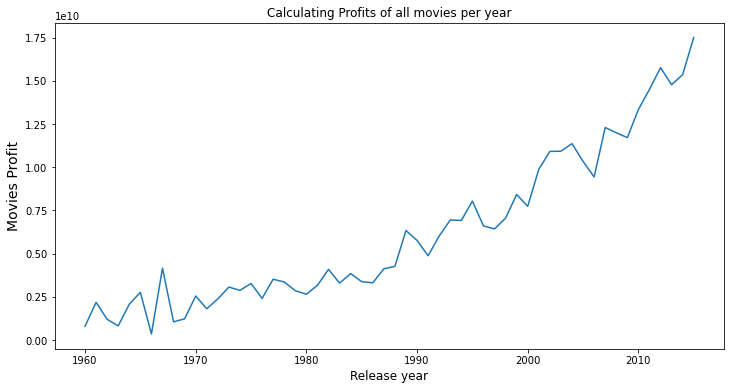

In [87]:
# plot the relation between movies profit per year 
profit_per_year=tmdb_df_cleaned.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6))
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Movies Profit',fontsize = 14)
plt.title('Calculating Profits of all movies per year')
plt.plot(profit_per_year)

#### As we can see the profits increases every year with excellent rate  as from 21418471 $ in 1960 to 1718723210 $ in 2010 which amasseive increase

<a id='conclusions'></a>
## Conclusions

> ### Which movie has the highest Profit? Which movie has the lowest Profit?
>
> movie with highest profit is 'Jaws' with profit 1878643093
>
> movie with lowest profit is "The Warrior's Way" movie lose 413912431 
>
> ### How many documentary movies there? is investing in it waste money?
>
>   We have 35 documentary movies
>
>   found that most of documentary movie has a good success rate which is almost less than the loss rate in movies in general.
>
> *   we can conclude that this is good investment
>
> ### which director, cast, genres are in great demand?
>
>   Genres: ‘Drama': 1742, 'Comedy': 1340, 'Thriller': 1192, 'Action': 1074,
>    'Adventure': 741
>
> *   As we can see Drama Then Comedy in a great demand
>
>   Cast: ‘Robert De Niro', 52), ('Bruce Willis', 46), ('Samuel L. Jackson', 3), ('Nicolas Cage', 43), ('Matt Damon', 36),     >   ('Johnny Depp', 35), ('Brad Pitt', 34), ('Tom Hanks', 34), ('Harrison Ford', 33), ('Tom Cruise', 33)
>
> *   As we can see 'Robert De Niro' and all above are in great demand
>
>    Director: Steven Spielberg', 28), ('Clint Eastwood', 24), ('Ridley Scott', 21)
>    ('Woody Allen', 18), ('Robert Rodriguez', 17), ('Tim Burton', 17), ('Steven Soderbergh', 17), ('Martin Scorsese', 17),     >    ('Robert Zemeckis', 15), ('Renny Harlin', 15)]
>
> *   As we can see 'Steven Spielberg' and all above are in great demand
> #### we can gather cast and one director from above and put them in a drama ,comedy or thrill movie and that will be a great investment.
>
> ### Movies profits investment increased or decreased every year? Is it a good investment?
>
>   As we can see the profits increases every year with excellent rate .
>
> ### Limitations:
>
> * Many rows without data   so from 10800 record only 3800 record stay and other been droped .
>
> * A lot of information should used like awards received for the movie .
>
> * Awards received by actors or actress to show there popularity .
>
> * movie writers as they have massive rule in movie success.
> 
> * Factors of success or fail of movie should be recorded as movie may release in war or global pandemic which contribute in movie fail .
